# Gaussian Filter and Derivatives of Gaussian

* Author: Johannes Maucher
* Last Update: 31th January 2021

Gaussian filters are frequently applied in image processing, e.g. for

- bluring 
- low-pass filtering
- noise suppression
- construction of Gaussian pyramids for scaling

Moreover, derivatives of the Gaussian filter can be applied to perform noise reduction and edge detection in one step. The derivation of a Gaussian-blurred input signal is identical to filter the raw input signal with a derivative of the gaussian. 

In this subsection the 1- and 2-dimensional Gaussian filter as well as their derivatives are introduced. Applications such as low-pass filtering, noise-suppression and scaling are subject of follow-up subsections.

## 1-dimensional Gaussian Filter

The univariate Gauss-function is defined as follows:

$$
g_{\sigma,\mu}(x) = \frac{1}{\sqrt{2 \pi} \sigma} \exp \left( - \frac{(x-\mu)^2}{2 \sigma^2}\right),
$$

where $\sigma$ is the standard deviation and $\mu$ is the mean. In the context of filtering, the mean is always $\mu=0$, the standard deviation $\sigma$ is a parameter, which determines the width of the filter. In the sequel the mean is implicetly assumed to be $\mu=0.$

Below, two Gauss functions with different $\sigma$ are plotted: 

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import scipy.ndimage as ndi
from matplotlib import pyplot as plt
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import warnings
warnings.filterwarnings("ignore")

In [2]:
sigma=1.5 #standard deviation
mu=0 # mean
x=np.arange(-9,9.1,0.1)
gaussContin=gauss=1/(np.sqrt(2*np.pi)*sigma)*np.exp(-1*(x-mu)**2/(2*sigma**2))
sigma2=3
gaussContin2=gauss=1/(np.sqrt(2*np.pi)*sigma2)*np.exp(-1*(x-mu)**2/(2*sigma2**2))

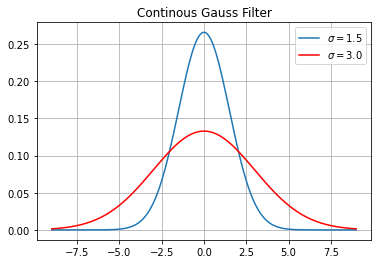

In [3]:
plt.plot(x,gaussContin, label="$\sigma=1.5$")
plt.plot(x,gaussContin2,"r", label="$\sigma=3.0$")
plt.grid(True)
plt.title("Continous Gauss Filter")
plt.legend()
plt.show()

In image processing we have discrete signals (the pixels of an image) and discrete filters. For the discrete index $u$, the **discrete Gaussian filter** is defined to be (for $\mu=0$):

$$
g_{\sigma}(u) = \frac{1}{\sqrt{2 \pi} \sigma} \exp \left( - \frac{(u)^2}{2 \sigma^2}\right),
$$

For discrete Gauss-filters, u is an integer in the range

$$
u \in [-z, \ldots, z],
$$

where usually $z=\lceil 3\sigma \rceil$. 

The output of the discrete Gaussian filtering, if applied to the discrete signal $f(i)$ is than

$$
h(i) = \sum\limits_{u=-z}^{z} \frac{1}{\sqrt{2 \pi} \sigma} \exp \left( - \frac{u^2}{2 \sigma^2}\right) f(i-u)
$$

Below, two discrete Gauss functions with different $\sigma$ are plotted: 

In [4]:
z=np.ceil(3*sigma2)
k=np.arange(-z,z+1)
gauss=1/(np.sqrt(2*np.pi)*sigma)*np.exp(-1*(k-mu)**2/(2*sigma**2))
gauss2=1/(np.sqrt(2*np.pi)*sigma2)*np.exp(-1*(k-mu)**2/(2*sigma2**2))

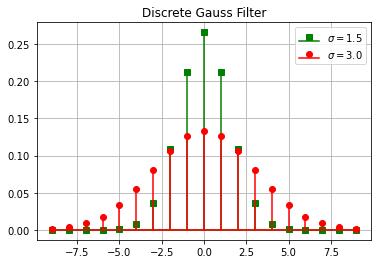

In [5]:
plt.stem(k,gauss,markerfmt="sg",linefmt="g",basefmt="g",label="$\sigma=1.5$")
plt.stem(k,gauss2,markerfmt="or",linefmt="r",basefmt="r",label="$\sigma=3.0$")
plt.grid(True)
plt.legend()
plt.title("Discrete Gauss Filter")
plt.show()

Next, the input signal x1 is filtered wit a discrete Gaussian filter with with $\sigma=1.5$:

In [6]:
x1=np.array([1,1,1,1,2,2,2,1,1,1,1])
fo3=ndi.convolve1d(x1, gauss, output=np.float64, mode='nearest')

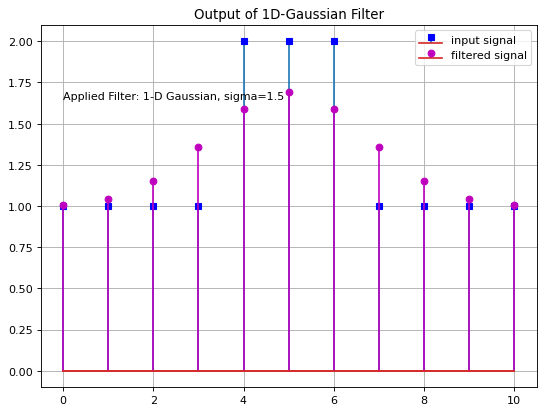

In [7]:
plt.figure(num=None, figsize=(8,6), dpi=80, facecolor='w', edgecolor='k')
plt.stem(x1,markerfmt="bs",linefmt='s',label="input signal")
plt.stem(fo3,markerfmt="mo",linefmt='m',label="filtered signal")
plt.title('Output of 1D-Gaussian Filter')
plt.text(0,1.65,'Applied Filter: 1-D Gaussian, sigma=1.5')
plt.grid(True)
plt.legend()
plt.show()

Instead of defining the Gauss-filter and applying the function `convolve1d()`, the same result can also be calculated by applying the function `gaussian_filter1d()` as follows:

In [8]:
fo3=ndi.gaussian_filter1d(x1, sigma=1.5, output=np.float64, mode='nearest')

## Derivatives of 1-dimensional Gaussian Filter

The 1st order derivative of the zero mean Gaussian function

$$
g_{\sigma}(x) = \frac{1}{\sqrt{2 \pi} \sigma} \exp \left( - \frac{x^2}{2 \sigma^2}\right)
$$

can easily be calcultated to be


$$
g'_{\sigma}(x)=\frac{\partial g_{\sigma}(x)}{\partial x}= -\frac{x}{\sigma^2} \frac{1}{\sqrt{2 \pi} \sigma} \exp \left( - \frac{x^2}{2 \sigma^2}\right) = -\frac{x}{\sigma^2} g_{\sigma}(x),
$$

And the 2nd order derivative is

$$
g''_{\sigma}(x)=\frac{\partial^2 g_{\sigma}(x)}{\partial x^2}=\left(\frac{x^2}{\sigma^4} - \frac{1}{\sigma^2} \right) \frac{1}{\sqrt{2 \pi} \sigma} \exp \left( - \frac{x^2}{2 \sigma^2}\right) = \left(\frac{x^2}{\sigma^4} - \frac{1}{\sigma^2} \right) g_{\sigma}(x).
$$

Below, the gaussian function and it's 1st and 2nd order derivative are visualized:

In [9]:
devxgauss=-x/sigma**2*gaussContin
devx2gauss=(x**2/sigma**4 - 1/sigma**2)*gaussContin

Text(0.5, 1.0, '2nd order derivative of Gaussian Filter')

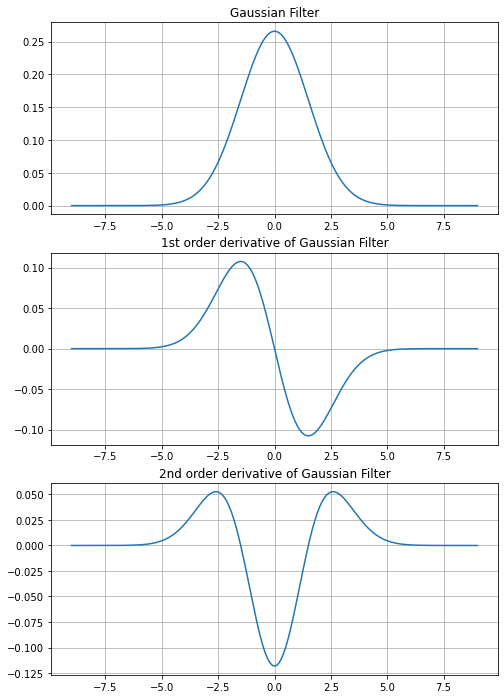

In [10]:
plt.figure(figsize=(8,12))
plt.subplot(3,1,1)
plt.grid(True)
plt.plot(x,gaussContin)
plt.title("Gaussian Filter")
plt.subplot(3,1,2)
plt.grid(True)
plt.plot(x,devxgauss)
plt.title("1st order derivative of Gaussian Filter")
plt.subplot(3,1,3)
plt.grid(True)
plt.plot(x,devx2gauss)
plt.title("2nd order derivative of Gaussian Filter")

**Gradient of a Signal:**

In [section filtering](02filtering.ipynb) it was shown that the gradient $\frac{\partial f}{\partial x}$ of a 1-dimensional discrete signal $f$ can be calculated by convolving the signal with the filter $h=(1,0,-1)$:

$$
\frac{\partial f}{\partial x}=h*f
$$

By comparing the form of filter $h$, with the first derivative of the Gaussian, it becomes obvious, that the first derivative of the Gaussian is a smoothed form of $h$. **Filtering a signal $f$ with a Gaussian and then calculating its gradient is the same as filtering the signal $f$ with the first order derivative of the Gaussian.**

## 2-dimensional Gaussian Filter


A 2-dimensional continous Gaussian filter (again $\mu=0$) is defined as follows:

$$
G_{\sigma}(x,y) = \frac{1}{2 \pi \sigma^2} \exp \left( - \frac{x^2+y^2}{2 \sigma^2}\right)
$$

The following function `gauss2d(mu,sigma,order)` plots either 
* the 2-dimensional Gauss-function, if `order=[0,0]`
* the x-derivative of the 2-dimensional Gauss-function, if `order=[0,1]`
* the y-derivative of the 2-dimensional Gauss-function, if `order=[1,0]`
* the 2nd order x-derivative of the 2-dimensional Gauss-function, if `order=[0,2]`
* the 2nd order y-derivative of the 2-dimensional Gauss-function, if `order=[2,0]`
* the Laplacian of Gaussian, if `order=[2,2]`.

In [11]:
def gauss2d(mu=[0,0], sigma=[1.5,1.5], order=[0,0]):
    """
    order =[0,0] plots the 2-dim Gauss function
    order =[0,1] plots the x-derivative of the 2-dim Gauss function
    order =[1,0] plots the y-derivative of the 2-dim Gauss function
    order =[0,2] plots the 2nd order x-derivative of the 2-dim Gauss function
    order =[2,0] plots the 2nd order y-derivative of the 2-dim Gauss function
    order =[2,2] plots the Laplacian of Gaussian
    """
    w, h = 100, 100

    std = [np.sqrt(sigma[0]), np.sqrt(sigma[1])]
    x = np.linspace(mu[0] - 3 * std[0], mu[0] + 3 * std[0], w)
    y = np.linspace(mu[1] - 3 * std[1], mu[1] + 3 * std[1], h)

    x, y = np.meshgrid(x, y)

    x_ = x.flatten()
    y_ = y.flatten()
    xy = np.vstack((x_, y_)).T

    normal_rv = multivariate_normal(mu, sigma)
    z = normal_rv.pdf(xy)
    z=z.reshape(w, h, order='F')
    title="2D-Gauss"
    if order == [1,0]:
        z = -x/sigma[0]**2*z.reshape(w, h, order='F')
        title="y-derivative of 2D-Gauss"
    elif order == [0,1]:
        z = -y/sigma[1]**2*z.reshape(w, h, order='F')
        title="x-derivative of 2D-Gauss"
    elif order == [0,2]:
        z = (y**2/sigma[1]**4-1/sigma[1]**2)*z.reshape(w, h, order='F')
        title="Second order x-derivative of 2D-Gauss"
    elif order == [2,0]:
        z = (x**2/sigma[1]**4-1/sigma[1]**2)*z.reshape(w, h, order='F')
        title="Second order y-derivative of 2D-Gauss"
    elif order == [2,2]:
        z = ((x**2+y**2)/sigma[1]**4-2/sigma[1]**2)*z.reshape(w, h, order='F')
        title="Second order y-derivative of 2D-Gauss" 

    fig = plt.figure(figsize=(10,10))
    ax = fig.gca(projection='3d')
    ax.plot_surface(x, y, z.T,rstride=3, cstride=3, linewidth=1, antialiased=True,
                cmap=cm.viridis)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title(title)
    plt.show()

    return z

First we plot the 2-dimensional Gauss function for $\mu=0, \sigma=0.5$:

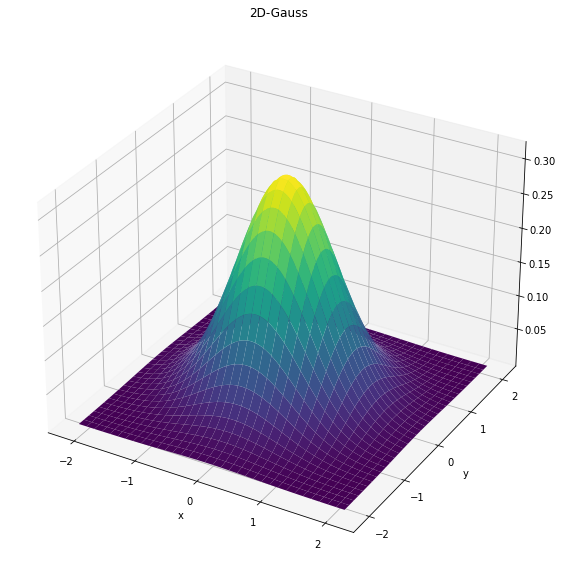

In [12]:
MU = [0,0]
SIGMA = [0.5,0.5]
z = gauss2d(MU, SIGMA, order=[0,0])

The discrete form of the Gaussian filter is

$$
G_{\sigma}(u,v)  =  \frac{1}{2 \pi \sigma^2} \exp \left( - \frac{u^2+v^2}{2 \sigma^2}\right),
$$

where $u$ and $v$ are integers in the range of $[-z, \ldots, z]$, and $z=\lceil 3\sigma \rceil$.

The convolution of a discrete 2-dimensional signal $F$ with the 2-dimensional Gaussian filter $G$ is then:

$$
H(i,j) = \sum\limits_{u=-k}^{k} \sum\limits_{v=-k}^{k} \frac{1}{2 \pi \sigma^2} \exp \left( - \frac{u^2+v^2}{2 \sigma^2}\right) F(i-u,j-v).
$$

Next, 2-dimensional Gaussian filtering is demonstrated. For this we define
a 2-dimensional signal $X1$ of shape (10,10) as a numpy-array. The signal values are 1 (white) in the (4,4)-center region and 0 (black) elsewhere.

Text(0.5, 1.0, '2-Dimensional Input Image')

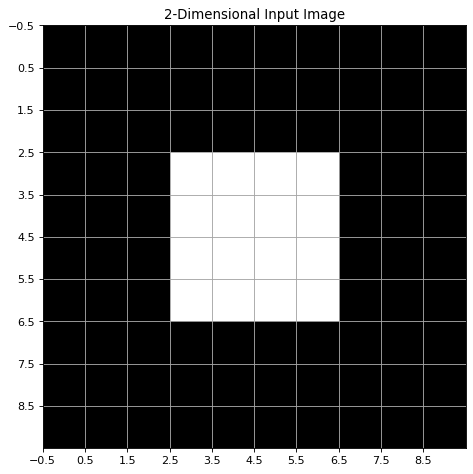

In [13]:
X1=np.zeros((10,10))
X1[3:7,3:7]=1

plt.figure(num=None, figsize=(14,7), dpi=80, facecolor='w', edgecolor='k')
plt.imshow(X1,cmap=plt.cm.gray,interpolation='none')
plt.xticks(np.arange(-0.5,9.5,1))
plt.yticks(np.arange(-0.5,9.5,1))
plt.grid(b=True,which='major',color='0.65')
plt.title('2-Dimensional Input Image')

Gaussian-filtering of the image $X1$ is performed in the following line:

In [14]:
fo0=ndi.gaussian_filter(X1,sigma=0.5,order=[0,0],output=np.float64, mode='nearest')

The filter output is displayed below:

Text(0.5, 1.0, 'Image X1 filtered by Gaussian filter')

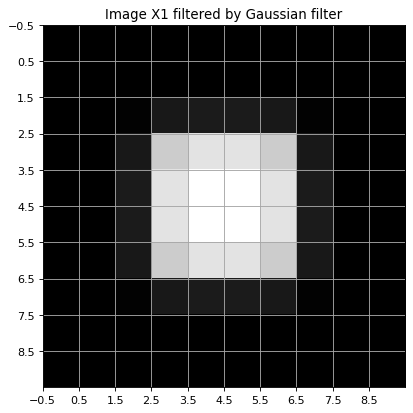

In [15]:
plt.figure(num=None, figsize=(12,6), dpi=80, facecolor='w', edgecolor='k')
plt.imshow(fo0,cmap=plt.cm.gray,interpolation='none')
plt.xticks(np.arange(-0.5,9.5,1))
plt.yticks(np.arange(-0.5,9.5,1))
plt.grid(b=True,which='major',color='0.65')
plt.title('Image X1 filtered by Gaussian filter')

## Derivatives of the 2-dimensional Gauss filter

For the 2-dimensional Gaussian $G_{\sigma}(x,y)$ the 1st order partial derivatives are

$$
\frac{\partial G_{\sigma}(x,y)}{\partial x}  =  -\frac{x}{\sigma^2} G_{\sigma}(x,y) 
$$

$$
\frac{\partial G_{\sigma}(x,y)}{\partial y}  =  -\frac{y}{\sigma^2} G_{\sigma}(x,y)
$$

The 1st order derivatives are visualized below:

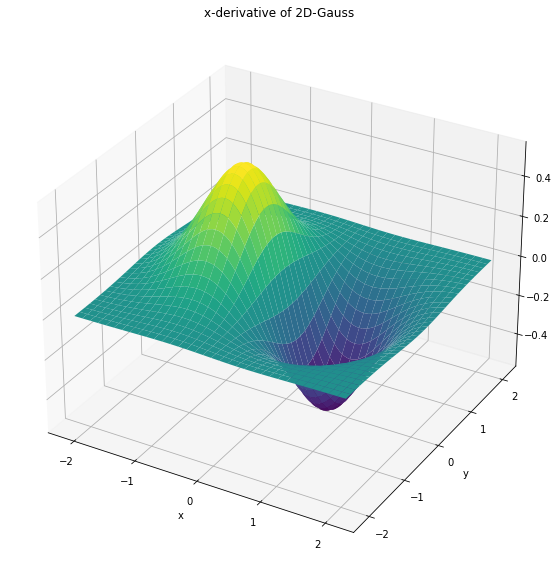

In [16]:
z = gauss2d(MU, SIGMA, order=[0,1])

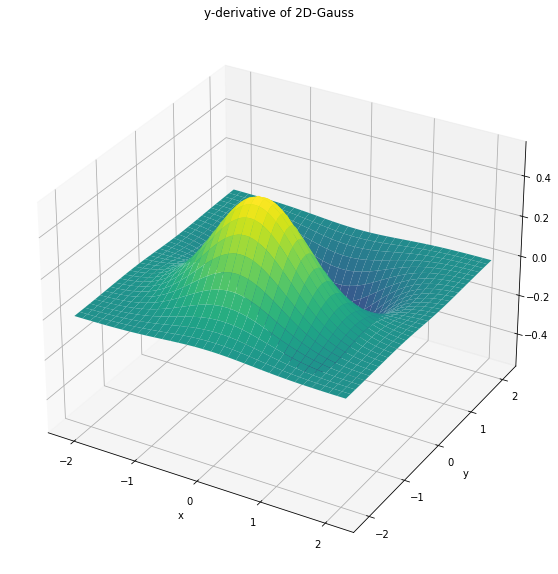

In [17]:
z = gauss2d(MU, SIGMA, order=[1,0])

Applying the 1st order derivatives of the Gaussian to the image $X1$ yields the output below:

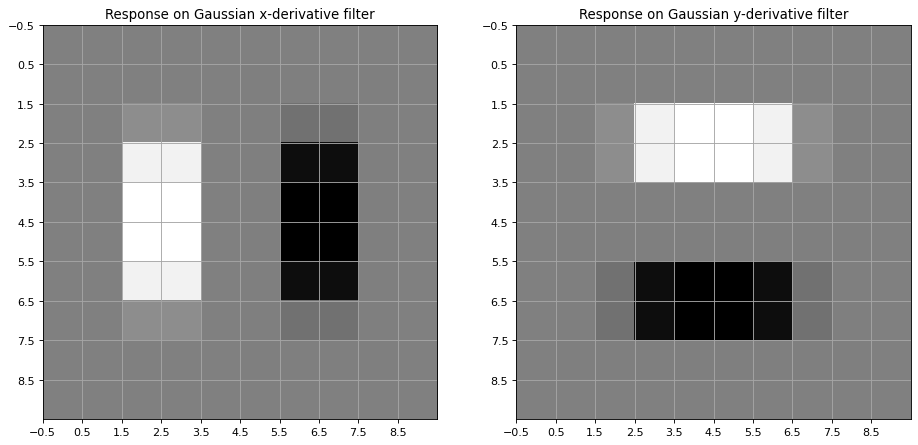

In [18]:
fo1=ndi.gaussian_filter(X1,sigma=0.5,order=[0,1],output=np.float64, mode='nearest')
plt.figure(num=None, figsize=(14,7), dpi=80, facecolor='w', edgecolor='k')
plt.subplot(1,2,1)
plt.imshow(fo1,cmap=plt.cm.gray,interpolation='none')
plt.xticks(np.arange(-0.5,9.5,1))
plt.yticks(np.arange(-0.5,9.5,1))
plt.grid(b=True,which='major',color='0.65')
plt.title('Response on Gaussian x-derivative filter')

fo2=ndi.gaussian_filter(X1,sigma=0.5,order=[1,0],output=np.float64, mode='nearest')
plt.subplot(1,2,2)
plt.imshow(fo2,cmap=plt.cm.gray,interpolation='none')
plt.xticks(np.arange(-0.5,9.5,1))
plt.yticks(np.arange(-0.5,9.5,1))
plt.grid(b=True,which='major',color='0.65')
plt.title('Response on Gaussian y-derivative filter')
plt.show()

- *Vertical Edges* in $F$ are **extemas** in 

$$
\frac{\partial G}{\partial x} * F
$$

- *Horizontal Edges* in $F$ are **extemas** in 

$$
\frac{\partial G}{\partial y} * F
$$

**2nd order Derivatives:**

Further derivation of the 1st order derivatives yields the **2nd order derivatives of the Gaussian** yields:

$$
\frac{\partial^2 (G_{\sigma}(x,y))}{\partial x^2}  =  \left( \frac{x^2}{\sigma^4} - \frac{1}{\sigma^2} \right) G_{\sigma}(x,y) 
$$

$$
\frac{\partial^2 (G_{\sigma}(x,y))}{\partial y^2}  =  \left(\frac{y^2}{\sigma^4} - \frac{1}{\sigma^2} \right) G_{\sigma}(x,y)
$$ (2nd_derivative_gauss)

These 2nd order derivatives are visualized below:

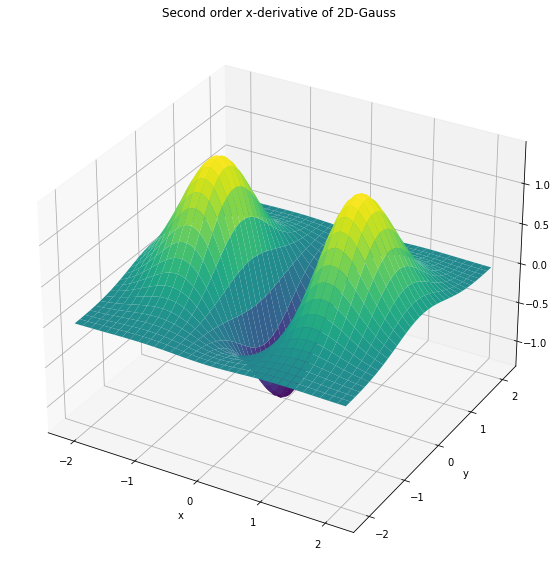

In [19]:
z = gauss2d(MU, SIGMA, order=[0,2])

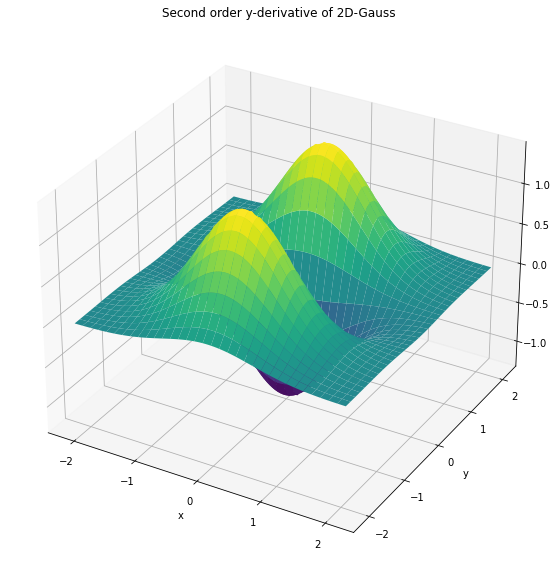

In [20]:
z = gauss2d(MU, SIGMA, order=[2,0])

Applying the 2nd order derivatives of the Gaussian to the image $X1$ yields the output below:

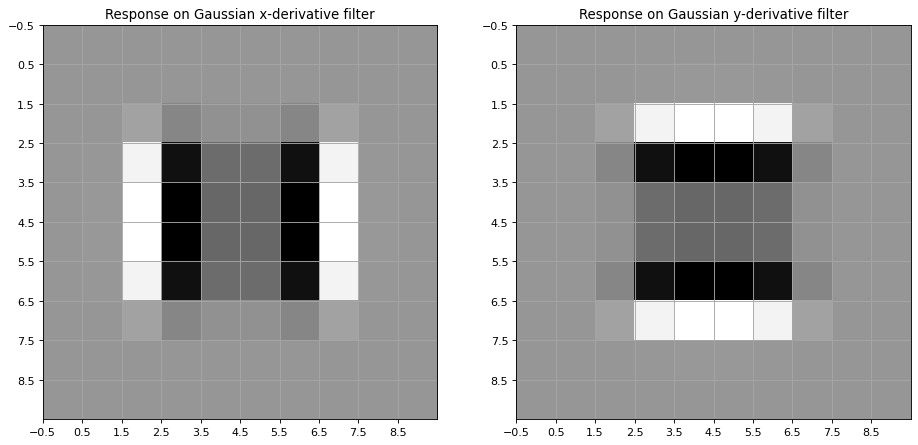

In [21]:
fo3=ndi.gaussian_filter(X1,sigma=0.5,order=[0,2],output=np.float64, mode='nearest')
plt.figure(num=None, figsize=(14,7), dpi=80, facecolor='w', edgecolor='k')
plt.subplot(1,2,1)
plt.imshow(fo3,cmap=plt.cm.gray,interpolation='none')
plt.xticks(np.arange(-0.5,9.5,1))
plt.yticks(np.arange(-0.5,9.5,1))
plt.grid(b=True,which='major',color='0.65')
plt.title('Response on Gaussian x-derivative filter')

fo4=ndi.gaussian_filter(X1,sigma=0.5,order=[2,0],output=np.float64, mode='nearest')
plt.subplot(1,2,2)
plt.imshow(fo4,cmap=plt.cm.gray,interpolation='none')
plt.xticks(np.arange(-0.5,9.5,1))
plt.yticks(np.arange(-0.5,9.5,1))
plt.grid(b=True,which='major',color='0.65')
plt.title('Response on Gaussian y-derivative filter')
plt.show()

## Laplacian Operator, Laplacian of Gaussian


- The **Laplacian Operator $\nabla^2 F$** is the undirected 2nd derivative of a 2-dimensional image $F$:

$$
\nabla^2 F = \frac{\partial^2 F}{\partial x^2}+\frac{\partial^2 F}{\partial y^2}
$$

- The second order derivatives of the 2-dim Gaussian filter are defined in {eq}`2nd_derivative_gauss`

- Smoothing an image $F$ with a Gaussian and then taking its Laplacian operator is equivalent to convolving the image $F$ with the **Laplacian of Gaussian (LoG) Filter**:

$$
\nabla^2 G_{\sigma}(x,y)=\left(\frac{x^2+y^2}{\sigma^4} - \frac{2}{\sigma^2}\right) G_{\sigma}(x,y) 
$$

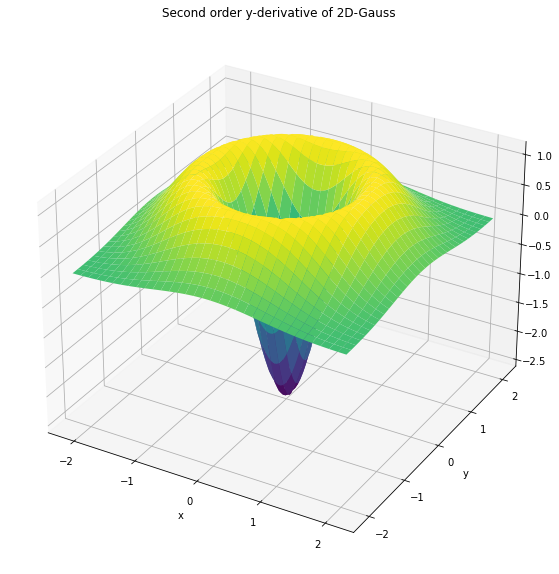

In [22]:
z = gauss2d(MU, SIGMA, order=[2,2])

- *Edges* in $F$ are **zero crossings** of the Laplacian operator applied to $F$ 

The Laplacian of Gaussian is a robust method to detect edges in images. Below the scipy-method `gaussian_laplace()` is applied to calculate the Laplacian of Gaussians of the image $X1$. The output is visualized. Moreover, the values of the output are ploted. As can be seen the zero-crossings (same as switch of sign) are actually at the edges of the input image.  

In [23]:
fo5=ndi.gaussian_laplace(X1,sigma=0.5,output=np.float64, mode='nearest')

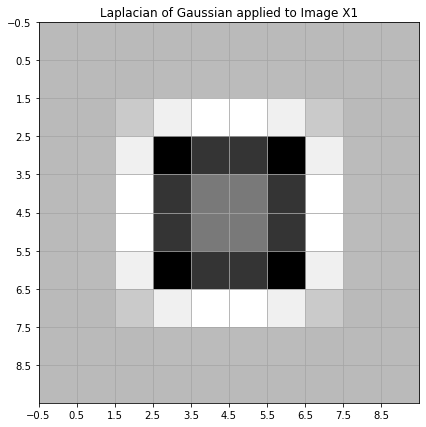

In [24]:
plt.figure(figsize=(7,7))
plt.imshow(fo5,cmap=plt.cm.gray,interpolation='none')
plt.xticks(np.arange(-0.5,9.5,1))
plt.yticks(np.arange(-0.5,9.5,1))
plt.grid(b=True,which='major',color='0.65')
plt.title('Laplacian of Gaussian applied to Image X1')
plt.show()

Values of output:

In [25]:
np.set_printoptions(precision=1,suppress=True)

In [26]:
fo5

array([[ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0.3,  1. ,  1.2,  1.2,  1. ,  0.3,  0. ,  0. ],
       [ 0. ,  0. ,  1. , -3.3, -2.4, -2.4, -3.3,  1. ,  0. ,  0. ],
       [ 0. ,  0. ,  1.2, -2.4, -1.2, -1.2, -2.4,  1.2,  0. ,  0. ],
       [ 0. ,  0. ,  1.2, -2.4, -1.2, -1.2, -2.4,  1.2,  0. ,  0. ],
       [ 0. ,  0. ,  1. , -3.3, -2.4, -2.4, -3.3,  1. ,  0. ,  0. ],
       [ 0. ,  0. ,  0.3,  1. ,  1.2,  1.2,  1. ,  0.3,  0. ,  0. ],
       [ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ]])